Tf-idf — metoda liczenia wagi terminów w oparciu o ich częstość w dokumencie (tf, term frequency) oraz ich rozkład w całym korpusie (idf, inverse document frequency). Wagi Tf-idf faworyzują słowa występujące w niewielu dokumentach, ponieważ mają większą siłę dyskryminacyjną.

Wartość idf w zależności od liczby dokumentów, w których dany termin występuje, dla kolekcji 100 dokumentów.


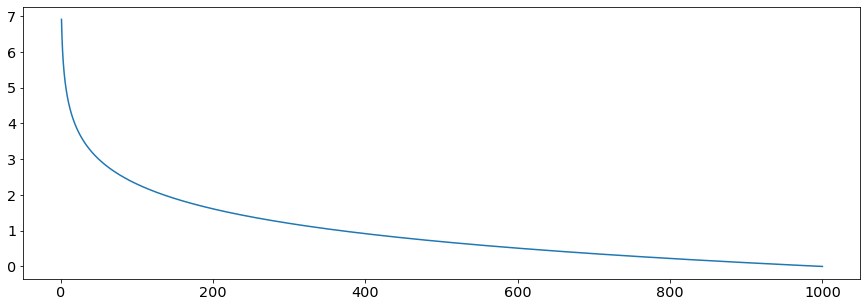

In [2]:
import pylab
import numpy as np

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

x = np.linspace(1, 1000, 100000)
y = np.log(1000/x)

pylab.plot(x, y)
print("Wartość idf w zależności od liczby dokumentów, w których dany termin występuje, dla kolekcji 1000 dokumentów.")

### Wektoryzacja

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
texts = [
    "kot pije mleko",
    "kot rozlał mleko i poszedł do dzieci",
    "pies i kot bawią się razem",
    "dzieci i pies bawią się razem",
    "tato rozlał mleko i poszedł do sklepu"
]

In [12]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)
for row in X.toarray():
  print(["%.3f" % col if col > 0 else '0    ' for col in row])

['0    ', '0    ', '0    ', '0.486', '0.486', '0    ', '0.726', '0    ', '0    ', '0    ', '0    ', '0    ', '0    ']
['0    ', '0.431', '0.431', '0.358', '0.358', '0    ', '0    ', '0.431', '0    ', '0.431', '0    ', '0    ', '0    ']
['0.462', '0    ', '0    ', '0.383', '0    ', '0.462', '0    ', '0    ', '0.462', '0    ', '0.462', '0    ', '0    ']
['0.447', '0    ', '0.447', '0    ', '0    ', '0.447', '0    ', '0    ', '0.447', '0    ', '0.447', '0    ', '0    ']
['0    ', '0.385', '0    ', '0    ', '0.319', '0    ', '0    ', '0.385', '0    ', '0.385', '0    ', '0.477', '0.477']


In [14]:
for idf, word in sorted(zip(vectorizer.idf_, vectorizer.get_feature_names()), reverse=True):
  print("%0.3f  %s" % (idf, word))

2.099  tato
2.099  sklepu
2.099  pije
1.693  się
1.693  rozlał
1.693  razem
1.693  poszedł
1.693  pies
1.693  dzieci
1.693  do
1.693  bawią
1.405  mleko
1.405  kot


### Podobieństwo

In [16]:
from sklearn.metrics.pairwise import cosine_similarity

In [17]:
sim_matrix = cosine_similarity(X, X)
sim_matrix

array([[1.        , 0.34809034, 0.18639488, 0.        , 0.15522094],
       [0.34809034, 1.        , 0.13721255, 0.19284153, 0.61175002],
       [0.18639488, 0.13721255, 1.        , 0.82609988, 0.        ],
       [0.        , 0.19284153, 0.82609988, 1.        , 0.        ],
       [0.15522094, 0.61175002, 0.        , 0.        , 1.        ]])

In [18]:
sim_text = zip([sim_matrix[0][n] for n in range(0, len(texts))], texts)

for sim, text in sorted(sim_text, reverse=True):
  print(f"{sim:<7.04}  {text[:50]}")

1.0      kot pije mleko
0.3481   kot rozlał mleko i poszedł do dzieci
0.1864   pies i kot bawią się razem
0.1552   tato rozlał mleko i poszedł do sklepu
0.0      dzieci i pies bawią się razem


### Porównanie z CountVectorizer

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()

count_X = count_vectorizer.fit_transform(texts)

count_sim_matrix = cosine_similarity(count_X, count_X)
count_sim_matrix

array([[1.        , 0.47140452, 0.25819889, 0.        , 0.23570226],
       [0.47140452, 1.        , 0.18257419, 0.18257419, 0.66666667],
       [0.25819889, 0.18257419, 1.        , 0.8       , 0.        ],
       [0.        , 0.18257419, 0.8       , 1.        , 0.        ],
       [0.23570226, 0.66666667, 0.        , 0.        , 1.        ]])

In [20]:
sim_text = zip([count_sim_matrix[0][n] for n in range(0, len(texts))], texts)
for sim, text in sorted(sim_text, reverse=True):
  print(f"{sim:<7.04}  {text[:50]}")

1.0      kot pije mleko
0.4714   kot rozlał mleko i poszedł do dzieci
0.2582   pies i kot bawią się razem
0.2357   tato rozlał mleko i poszedł do sklepu
0.0      dzieci i pies bawią się razem
